<a href="https://colab.research.google.com/github/aashish3808/generative-ai-for-beginners/blob/main/BostonHousePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [ ]:
BosData = pd.read_csv('BostonHousing.csv')
X = BosData.iloc[:,0:11]
y = BosData.iloc[:, 13] # MEDV: Median value of owner-occupied homes in $1000s

ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=128, activation='relu', input_dim=11))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1,))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 460.0618
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86.0587
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.5142
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.2961
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.7907
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.2501
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.1566
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.4583
Epoch 9/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.6321
Epoch 10/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.2374
Epoch 11/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.3356
Epoch 12/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.8259
Epoch 13/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.9867
Epoch 14/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.2912
Epoch 15/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [ ]:
ypred = model.predict(Xtest)
ypred= ypred[:, 0]
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
print(f"TEST DATA MEAN SQUARED ERROR: {mse:.2f}")
print(f"TEST R2 SCORE: {r2:.2f}")


TEST DATA MEAN SQUARED ERROR: 8.59
TEST R2 SCORE: 0.90


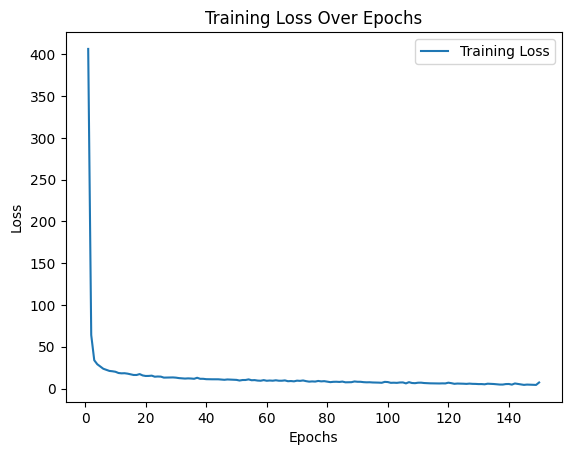

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(history.history['loss'])+1), history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()